In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random

In [2]:
df_1 = pd.read_csv('penguins.csv')
df_1 = df_1.drop('Comments', axis = 1)
df = df_1.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            325 non-null    object 
 1   Sample Number        325 non-null    int64  
 2   Species              325 non-null    object 
 3   Region               325 non-null    object 
 4   Island               325 non-null    object 
 5   Stage                325 non-null    object 
 6   Individual ID        325 non-null    object 
 7   Clutch Completion    325 non-null    object 
 8   Date Egg             325 non-null    object 
 9   Culmen Length (mm)   325 non-null    float64
 10  Culmen Depth (mm)    325 non-null    float64
 11  Flipper Length (mm)  325 non-null    float64
 12  Body Mass (g)        325 non-null    float64
 13  Sex                  325 non-null    object 
 14  Delta 15 N (o/oo)    325 non-null    float64
 15  Delta 13 C (o/oo)    325 non-null    flo

<Axes: xlabel='Culmen Depth (mm)', ylabel='Body Mass (g)'>

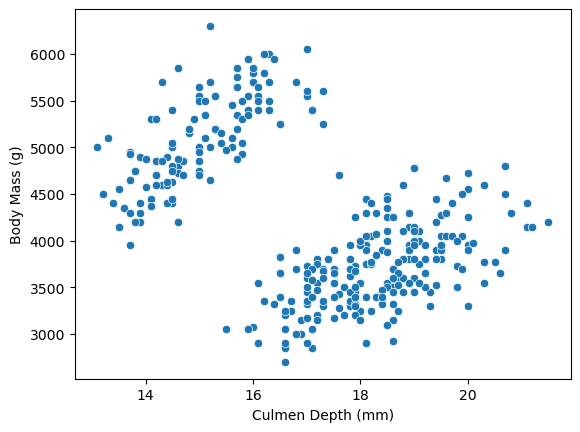

In [3]:
#will use culmen depth to predict body mass
sns.scatterplot(data=df, x = 'Culmen Depth (mm)', y = 'Body Mass (g)')

In [4]:
trainDF = df[['Culmen Depth (mm)', 'Body Mass (g)']].copy()
trainDF = trainDF.sort_values('Culmen Depth (mm)').reset_index(drop=True)
trainDF.head()

,Culmen Depth (mm),Body Mass (g)
0,13.1,5000.0
1,13.2,4500.0
2,13.3,5100.0
3,13.4,4400.0
4,13.5,4550.0


In [5]:
residuals = []
thresholds = []
#holds a list of lists of means, [0] is mean for under threshold, [1] is the mean for over threshold
threshMeans  =[]

for i in range(len(trainDF)-1):
    threshold = round((trainDF.loc[i, 'Culmen Depth (mm)'] + trainDF.loc[i+1, 'Culmen Depth (mm)'])/2,2)
    thresholds.append(threshold)

for i in range(len(thresholds)):
    underThresh = []
    overThresh = []
    
    for j in range(len(trainDF)):
        if trainDF.loc[j, 'Culmen Depth (mm)'] < thresholds[i]:
            underThresh.append(trainDF.loc[j, 'Body Mass (g)'])
        elif trainDF.loc[j, 'Culmen Depth (mm)'] > thresholds[i]:
            overThresh.append(trainDF.loc[j, 'Body Mass (g)'])
    
    #sum of squared residuals
    ssr = 0
    means = [np.mean(underThresh),np.mean(overThresh)]
    for j in range(len(underThresh)):
        resid = underThresh[j] - means[0]
        ssr += resid**2
    for j in range(len(overThresh)):
        resid = overThresh[j] - means[1]
        ssr += resid**2
    
    threshMeans.append(means)
    residuals.append(ssr)

<Axes: >

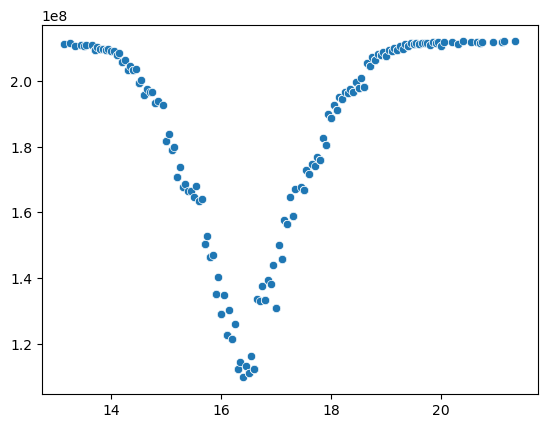

In [6]:
sns.scatterplot(x = thresholds, y = residuals)

In [13]:
#branch condition, expected output
decisionTreeBranches = []
decisionTreeBranches.append([thresholds[residuals.index(min(residuals))], threshMeans[residuals.index(min(residuals))][0]])
decisionTreeBranches

[[16.4, 4950.431034482759]]